<a href="https://colab.research.google.com/github/KirillSmirnov2/InnopolisStudentPublicRepository/blob/main/Test2_SmirnovKK%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Промежуточная аттестация №2**


Использовать любой датасет с численными и категориальными данными, с количеством строк больше 30.
Выполнить задания:

1. Провести первичный анализ и предобработку датафрейма Nasdaq https://disk.yandex.ru/i/TLKCZALyC4e71g.

2. Выбрать случайным образом компанию из списка Nasdaq: np.random.seed(0)np.random.randint(1, len(nasdaq)) Определить год IPO, страну, сектор и индустрию.

3.  Оценить степень связи между двумя категориальными переменными: страной и индустрией.

4. Рассмотреть, как распределены доли рыночной стоимости компаний из этого сектора. Сравнить с распределениями всех остальных секторов.

5. Провести анализ курса акций компании за все время с момента выхода на рынок.

6.  Рассчитать индекс индустрии за последние 20 лет (можно меньше) на основе 10 крупнейших компаний. Сравнить динамику индекса и курса акций выбранной компании.

7. Сравнить динамику показателей мировой экономики (ВВП, население, инфляция и т.д., не менее пяти) и динамику индекса. Использовать данные: https://datahub.io/collections/economic-data#other-economic-data-and-indicators

8. Сравнить курс акций компании и динамику показателей национальной экономики (не менее пяти). Использовать данные: https://microdata.worldbank.org/index.php/catalog/history/

9.  Сделать предсказание курса акций с помощью модели ARIMA, на следующие две недели. Подобрать наилучшие параметры модели.

10. Загрузить в блокнот изображение логотипа компании. Выполнить с изображением 3-4 операции, используя любые функции из библиотеки OpenCV (кроме изменения контраста и яркости).https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html



In [1]:
import numpy as np
import pandas as pd
import math
import time
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from itertools import filterfalse
from sklearn.linear_model import LinearRegression
import random
import datetime




---
# Задача 1 V
Провести первичный анализ и предобработку датафрейма Nasdaq https://disk.yandex.ru/i/TLKCZALyC4e71g.


---

In [2]:
#df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df=pd.read_excel('Nasdaq.xlsx')
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3905 entries, 0 to 3904
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NN          3905 non-null   int64  
 1   Symbol      3905 non-null   object 
 2   Name        3905 non-null   object 
 3   Last Sale   3905 non-null   object 
 4   Net Change  3905 non-null   float64
 5   % Change    3905 non-null   object 
 6   Market Cap  3905 non-null   int64  
 7   Country     3905 non-null   object 
 8   IPO Year    3905 non-null   int64  
 9   Volume      3905 non-null   int64  
 10  Sector      3905 non-null   object 
 11  Industry    3905 non-null   object 
 12  Z           3905 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 396.7+ KB


,NN,Net Change,Market Cap,IPO Year,Volume
count,3905.000000,3905.000000,3.905000e+03,3905.000000,3.905000e+03
mean,4170.461460,-0.991582,5.754744e+09,2013.071703,5.780370e+05
std,2377.129162,4.169152,6.353889e+10,10.522540,2.639760e+06
min,0.000000,-170.985000,0.000000e+00,1925.000000,1.000000e+00
25%,2191.000000,-0.730000,3.427910e+07,2007.000000,9.897000e+03
50%,4181.000000,-0.170000,2.704117e+08,2018.000000,7.495700e+04
75%,6236.000000,-0.010000,1.165274e+09,2021.000000,3.249490e+05
max,8356.000000,7.380000,2.330135e+12,2022.000000,6.188427e+07


In [3]:
#df.loc[df['Symbol'].duplicated() == True]
df.loc[df.duplicated() == True]

,NN,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry,Z


Дубликаты отсутствуют

not null - отсутствуют;


Last Sale - object ,

 % Change  - object

   требуется исправить, перевести в численные значения

   market cap eq 0 - всякие непонятные notes, warrants  и units уберем из рассмотрения



In [4]:
# @title фанкции для map() быстрой замены $ %
def proc(zap):
    return zap.replace('%','')

def usd(zap):
    return zap.replace('$','')

In [5]:
#print(df['Last Sale'])   #print(df['% Change'])
df1=df.copy(deep=True)
S1=pd.Series(list(map(usd, df['Last Sale'].values.tolist())))
S2=pd.Series(list(map(proc, df['% Change'].values.tolist())))
df1['Last Sale']=pd.to_numeric(S1, downcast='float')
df1['% Change']=pd.to_numeric(S2, downcast='float')
#print(type(S))
df2=df1.loc[df1['Market Cap'] != 0 ]
df2.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3197 entries, 0 to 3903
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NN          3197 non-null   int64  
 1   Symbol      3197 non-null   object 
 2   Name        3197 non-null   object 
 3   Last Sale   3197 non-null   float32
 4   Net Change  3197 non-null   float64
 5   % Change    3197 non-null   float32
 6   Market Cap  3197 non-null   int64  
 7   Country     3197 non-null   object 
 8   IPO Year    3197 non-null   int64  
 9   Volume      3197 non-null   int64  
 10  Sector      3197 non-null   object 
 11  Industry    3197 non-null   object 
 12  Z           3197 non-null   object 
dtypes: float32(2), float64(1), int64(4), object(6)
memory usage: 324.7+ KB


== ==================================================== == ==========================================

# Задача 2 V
Выбрать случайным образом компанию из списка Nasdaq: np.random.seed(0)np.random.randint(1, len(nasdaq)) Определить год IPO, страну, сектор и индустрию.


== ==================================================== == ==========================================

In [6]:
# @title выбор компании
np.random.seed(0)
Choice=np.random.randint(1, len(df2))
print('выбрано случайно :',Choice)
print('Название :',df2['Name'].iloc[Choice])
print('Шифр :',df2['Symbol'].iloc[Choice])
print('год IPO :',df2['IPO Year'].iloc[Choice])
print('страна :',df2['Country'].iloc[Choice])
print('сектор :',df2['Sector'].iloc[Choice])
print('индустрия :',df2['Industry'].iloc[Choice])




выбрано случайно : 2733
Название : Frontier Acquisition Corp. Class A Ordinary Shares
Шифр : FRON
год IPO : 2021
страна : United States
сектор : Finance
индустрия : Business Services


== ==================================================== == ==========================================

# Задача 3 V
Оценить степень связи между двумя категориальными переменными: страной и индустрией.


== ==================================================== == ==========================================

In [7]:
# @title анализ базы , что выбрать, количество компаний по странам
Set_Country_=set(df2['Country'].tolist())
Set_Sector__=set(df2['Sector'].tolist())
Set_Industry=set(df2['Industry'].tolist())
print('Список стран     в базе: ',len(Set_Country_),'. Перечень: ',Set_Country_)
print('Список секторов  в базе: ',len(Set_Sector__),'. Перечень: ',Set_Sector__)
print('Список индустрий в базе: ',len(Set_Industry),'. Перечень: ',Set_Industry)

df2_1=df2.loc[df2['Country'] !='United States']
print(len(df2_1), ' nonUSA companies')
Dist_countries=[]
mxll=0
for i in Set_Country_:
  if mxll < len(i):
    mxll=len(i)
for i in Set_Country_:
  ew=len(df2.loc[df2['Country'] == i])
  ss2=(mxll-len(i))*' '
  Dist_countries.append(ew)
  print(f' {i} {ss2} -  {ew}')



Список стран     в базе:  46 . Перечень:  {'Curacao', 'China', 'Panama', 'Netherlands', 'Denmark', 'Israel', 'Spain', 'Ireland', 'Hong Kong', 'Bermuda', 'Japan', 'Jersey', 'Greece', 'Malaysia', 'Switzerland', 'Finland', 'Monaco', 'United States', 'Brazil', 'South Africa', 'Cayman Islands', 'Macau', 'Italy', 'Peru', 'Costa Rica', 'France', 'Australia', 'Taiwan', 'United Kingdom', 'Belgium', 'Malta', 'Chile', 'United Arab Emirates', 'Puerto Rico', 'Jordan', 'Sweden', 'Luxembourg', 'Isle of Man', 'Norway', 'Mexico', 'South Korea', 'Germany', 'Argentina', 'Singapore', 'India', 'Canada'}
Список секторов  в базе:  12 . Перечень:  {'Basic Materials', 'Real Estate', 'Utilities', 'Telecommunications', 'Technology', 'Consumer Discretionary', 'Energy', 'Miscellaneous', 'Finance', 'Industrials', 'Health Care', 'Consumer Staples'}
Список индустрий в базе:  144 . Перечень:  {'Professional Services', 'Cable & Other Pay Television Services', 'Beverages - Non-Alcoholic', 'Multi-Sector Companies', 'Toba

In [8]:
# @title Что выбрать - количество команий по индустриям
Dist_companies_indust=[]
Dist_countries_indust=[]
mxll2=0
for i in Set_Industry:
  if mxll2 < len(i):
    mxll2=len(i)
for i in Set_Industry:
  ew=len(df2.loc[df2['Industry'] == i])
  ss3=(mxll2-len(i))*' '
  Dist_countries_indust.append(ew)
  print(f' {i} {ss3} -  {ew}')

 Professional Services                                           -  8
 Cable & Other Pay Television Services                           -  2
 Beverages - Non-Alcoholic                                       -  2
 Multi-Sector Companies                                          -  3
 Tobacco                                                         -  1
 Electric Utilities: Central                                     -  12
 Catalog/Specialty Distribution                                  -  19
 Building operators                                              -  3
 RETAIL: Building Materials                                      -  2
 Hospital/Nursing Management                                     -  10
 Industrial Specialties                                          -  27
 Medical/Nursing Services                                        -  5
 Trusts Except Educational Religious and Charitable              -  85
 Specialty Chemicals                                             -  75
 Agricultural 

In [9]:
# @title уникальность индустрий - каких не представлено в США и из каких стран
df2_1=df2.loc[df2['Country'] !='United States']
df2_0=df2.loc[df2['Country'] =='United States']
set_nonUS_ind=set(df2_1['Industry'].values.tolist())
set____US_ind=set(df2_0['Industry'].values.tolist())
print('Non USA industries in dataset :',len(set_nonUS_ind) ,'.  Перечень : ', set_nonUS_ind)
print('___ USA industries in dataset :',len(set____US_ind) ,'.  Перечень : ', set____US_ind)
set_common=set_nonUS_ind.intersection(set____US_ind)
print('Common industies : ',len(set_common) ,'  Перечень:  ' ,set_common)
a____USA_unique_ind=set____US_ind-set_nonUS_ind
a_nonUSA_unique_ind=set_nonUS_ind-set____US_ind

print('a____USA_unique_ industies : ',len(a____USA_unique_ind) ,'  Перечень:  ' ,a____USA_unique_ind)
print('a_nonUSA_unique_ industies : ',len(a_nonUSA_unique_ind) ,'  Перечень:  ' ,a_nonUSA_unique_ind)
set_a_nonUSA_unique_ind_counties=set(df2['Country'].loc[df2['Industry'].isin(a_nonUSA_unique_ind)].values.tolist())
print('==================================')
print('set_a_nonUSA_unique_ind_counties : ',len(set_a_nonUSA_unique_ind_counties) ,'  Перечень:  ' ,set_a_nonUSA_unique_ind_counties)
df2_x=df2.loc[df2['Industry'].isin(a_nonUSA_unique_ind)]
df2_x=df2_x.drop(['NN','Last Sale', 'Net Change','IPO Year','Volume','Z','% Change','Sector','Market Cap'], axis= 1 )


print(df2_x)

Non USA industries in dataset : 93 .  Перечень :  {'Professional Services', 'Multi-Sector Companies', 'Electric Utilities: Central', 'Catalog/Specialty Distribution', 'Industrial Specialties', 'Medical/Nursing Services', 'Specialty Chemicals', 'Agricultural Chemicals', 'Biotechnology: Pharmaceutical Preparations', 'Biotechnology: Electromedical & Electrotherapeutic Apparatus', 'Metal Mining', 'Recreational Games/Products/Toys', 'Industrial Machinery/Components', 'Business Services', 'Metal Fabrications', 'Life Insurance', 'Computer peripheral equipment', 'Professional and commerical equipment', 'Other Specialty Stores', 'Biotechnology: Biological Products (No Diagnostic Substances)', 'Computer Software: Programming Data Processing', 'Internet and Information Services', 'Hotels/Resorts', 'Plastic Products', 'Steel/Iron Ore', 'Oil Refining/Marketing', 'Auto Parts:O.E.M.', 'Retail-Drug Stores and Proprietary Stores', 'Other Consumer Services', 'Auto Manufacturing', 'Finance: Consumer Serv

== ==================================================== == ==========================================

# Задача 4 V
Рассмотреть, как распределены доли рыночной стоимости компаний из этого сектора. Сравнить с распределениями всех остальных секторов.

== ==================================================== == ==========================================

In [10]:
# @title Определение стоимости компаний секторов
Sum_MC=df2['Market Cap'].sum()
CH_Sector=df2['Sector'].iloc[Choice]

mxl=0
for i in Set_Sector__:
  if len(i) > mxl:
    mxl=len(i)
print('=================================')
Sectors_Name, Sectors_MCsum=[], []
for i in Set_Sector__:
  Sectors_Name.append(i)
  df3=df2.loc[df2['Sector'] == i]
  Subset_Sector_X_Industry=set(df3['Industry'].tolist())
  Sectors_MCsum.append(df3['Market Cap'].values.sum()/Sum_MC)
  proc=df3['Market Cap'].values.sum()/Sum_MC*100
  ss=(mxl-len(i))*' '
  print(f'Industries within the Sector [{i}] : {ss}  {len(Subset_Sector_X_Industry)} ;  market cap share : {proc:.2f} %    . Перечень: {Subset_Sector_X_Industry}')
print('=================================')

df3=df2.loc[df2['Sector'] == CH_Sector]
proc=df3['Market Cap'].values.sum()/Sum_MC*100
print(f'Sector (chosen {Choice}): {CH_Sector} ; market cap share : {proc:.4f} %' )


Industries within the Sector [Basic Materials] :          6 ;  market cap share : 0.73 %    . Перечень: {'Construction Materials', 'Other Metals and Minerals', 'Precious Metals', 'Metal Mining', 'Forest Products', 'Paper'}
Industries within the Sector [Real Estate] :              4 ;  market cap share : 2.19 %    . Перечень: {'Real Estate', 'Building operators', 'Other Consumer Services', 'Real Estate Investment Trusts'}
Industries within the Sector [Utilities] :                9 ;  market cap share : 1.42 %    . Перечень: {'Environmental Services', 'Oil/Gas Transmission', 'Medical Specialities', 'Other Specialty Stores', 'Natural Gas Distribution', 'Telecommunications Equipment', 'Water Supply', 'Electric Utilities: Central', 'Power Generation'}
Industries within the Sector [Telecommunications] :       3 ;  market cap share : 1.18 %    . Перечень: {'Telecommunications Equipment', 'Computer Communications Equipment', 'Cable & Other Pay Television Services'}
Industries within the Sector

minMC= 2.945629  mln $ ;  maxMC=2330135.028532 mln $
3197 число записей
Max = 2330135.028532 ; Min = 2.945629
Sector =  Basic Materials         company count = 10
MC distrib % of Total MC: 
0.00000  0.00000  0.00040  0.00250  0.03417  0.19085  0.50269  0.00000
Количество записей  0  0  2  2  3  2  1  0
Sector =  Real Estate             company count = 130
MC distrib % of Total MC: 
0.00000  0.00004  0.00245  0.10386  0.95596  1.12283  0.00000  0.00000
Количество записей  0  1  16  44  59  10  0  0
Sector =  Utilities               company count = 47
MC distrib % of Total MC: 
0.00000  0.00000  0.00046  0.02110  0.38413  1.01344  0.00000  0.00000
Количество записей  0  0  3  11  24  9  0  0
Sector =  Telecommunications      company count = 22
MC distrib % of Total MC: 
0.00000  0.00000  0.00130  0.00940  0.05550  0.31520  0.80111  0.00000
Количество записей  0  0  9  4  4  4  1  0
Sector =  Technology              company count = 455
MC distrib % of Total MC: 
0.00000  0.00016  0.01263 

<ipython-input-11-a6fad7285805>:90: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_sector_MC=np.array(ListT)


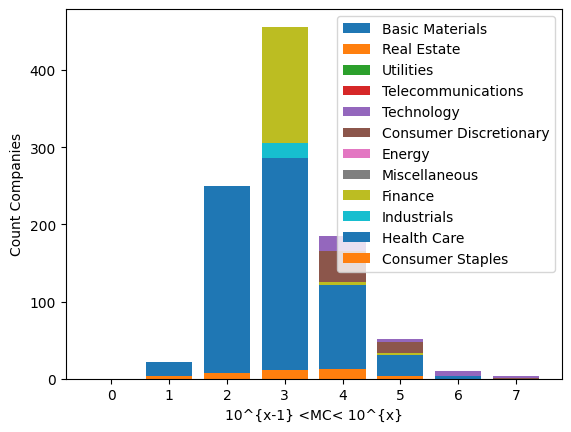

In [11]:
# @title Смотрим каждый сектор по распределению стоимостей компаний
Sum_MCmln=Sum_MC/1000000
MCi_max=df2['Market Cap'].max()/1000000
MCi_min=df2['Market Cap'].min()/1000000
print(f'minMC= {MCi_min}  mln $ ;  maxMC={MCi_max} mln $')
#rng=[1, 10, 100, 1000, 10000, 100000, 1000000 , 10 000 000]
rng=[0, 1, 2, 3, 4, 5, 6 , 7]
dist_CSymb, dist_MC, dist_Numc=[] ,[] ,[]
#MC_dist=[[1<=x<10],[10<=x<100],[100<=x<1000],[1000<=x<10000],[10000<=x<100000],[100000<=x<1000000],[1000000<=x<10000000],[10000000<=x<100 000 000]]
NNN=len(df2)
print(NNN , 'число записей')
for i in rng:  # c log10 шагом
  mn=1000000*(10**(i-1))
  mx=1000000*(10**(i))
  df4=df2.loc[df2['Market Cap']<mx]
  df4=df4.loc[df4['Market Cap']>=mn]
  dist_MC.append(df4['Market Cap'].values.sum()/1000000)
  dist_Numc.append(len(df4))
  dist_CSymb.append(df4['Symbol'].tolist())

  #  if (MCi <= 10**(i-1)) and (MCi < 10**i):
  #    MC_dist[i].append(MCi)
  #    #MC_dist_codes[i].append(df3['Symbol'].iloc[j])

#print(dist_MC)
#print(dist_Numc)
#print(len(dist_CSymb[3]), dist_CSymb[1])

print(f'Max = {MCi_max} ; Min = {MCi_min}')

sector_distMCs=[]
sector_numc=[]
for i in Set_Sector__:
  df3=df2.loc[df2['Sector'] == i]
  ss=(mxl-len(i))*' '
  sec_list, sec_MC_list, sec_MCproc_list=[],[],[]
  nn=0
  for j in rng:

    RangeMC_company_set=set(dist_CSymb[j])
    df4=df3.loc[df3['Symbol'].isin(RangeMC_company_set)]
    sec_list.append(len(df4))
    nn+=len(df4)
    sec_MC_list.append(df4['Market Cap'].values.sum()/1000000)
    proc=(df4['Market Cap'].values.sum()/1000000)/Sum_MCmln*100
    sec_MCproc_list.append(proc)
    if nn >100:
      ss1=0*' '
    else:
      if nn>10:
        ss1=1*' '
      else:
        ss1=2*' '

  sector_numc.append(sec_list)
  sector_distMCs.append(sec_MCproc_list)
  print('=================================')
  print(f'Sector =  {i} {ss} company count = {nn}')
  print(f'MC distrib % of Total MC: ')
  print(f'{sec_MCproc_list[0]:.5f}  {sec_MCproc_list[1]:.5f}  {sec_MCproc_list[2]:.5f}  {sec_MCproc_list[3]:.5f}  {sec_MCproc_list[4]:.5f}  {sec_MCproc_list[5]:.5f}  {sec_MCproc_list[6]:.5f}  {sec_MCproc_list[7]:.5f}')
  print(f'Количество записей  {sec_list[0]}  {sec_list[1]}  {sec_list[2]}  {sec_list[3]}  {sec_list[4]}  {sec_list[5]}  {sec_list[6]}  {sec_list[7]}')


  #print(f'          1 -            10     : {sec_MCproc_list[0]:.6f}')
  #print(f'         10 -           100     : {sec_MCproc_list[1]:.6f}')
  #print(f'        100 -         1 000     : {sec_MCproc_list[2]:.6f}')
  #print(f'      1 000 -        10 000     : {sec_MCproc_list[3]:.6f}')
  #print(f'     10 000 -       100 000     : {sec_MCproc_list[4]:.6f}')
  #print(f'    100 000 -     1 000 000     : {sec_MCproc_list[5]:.6f}')
  #print(f'  1 000 000 -    10 000 000     : {sec_MCproc_list[6]:.6f}')
  #print(f' 10 000 000 -   100 000 000     : {sec_MCproc_list[7]:.6f}')


#arr_Y=np.array(sec_MCproc_list[i)
#arr_X=np.array(rng)
#print('-----------------------------')
#plt.scatter(arr_X, arr_Y, label='ish tochki', color = 'red',s=100)
  #arr_Y=np.array(sec_MCproc_list[i])
  #arr_X=np.array(rng)
  #plt.scatter(arr_X, arr_Y, label='ish tochki', color = 'red',s=100)
print(dist_CSymb)
#print(sector_numc)
#print(sector_distMCs)
ListT=[]
Lista=[]
for i in Set_Sector__:
  df3=df2.loc[df2['Sector'] == i]
  Lista=df3['Market Cap'].values.tolist()
  ListT.append(Lista)

arr_sector_MC=np.array(ListT)
#print(arr_sector_MC)
arr_sector_numc = np.array(sector_numc)
arr_sector_distMCs = np.array(sector_distMCs)
#print(arr_sector_numc)
#print(arr_sector_distMCs)
ctr=0
plt.clf()
for i in Set_Sector__:
  plt.bar(rng, arr_sector_numc[ctr],  label= i)
  plt.legend()
  ctr+=1
  #print(ctr)
plt.xlabel('10^{x-1} <MC< 10^{x}')
plt.ylabel('Count Companies')


plt.show()

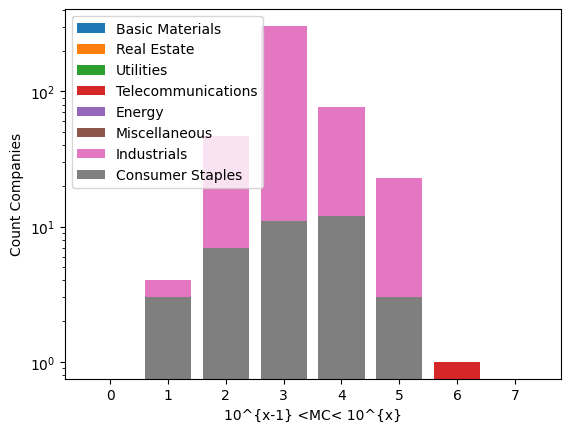

In [12]:
# @title На график выведем распределение стоимости
ctr=0
plt.clf()
for i in Set_Sector__:
  if  (i!= 'Consumer Discretionary') and  (i!= 'Technology') and (i!= 'Health Care')and (i!= 'Finance'):
    plt.bar(rng,arr_sector_numc[ctr],  label= i)
    plt.legend()
  ctr+=1
  #print(ctr)
plt.xlabel('10^{x-1} <MC< 10^{x}')
plt.ylabel('Count Companies')
plt.yscale(value='log')
plt.show()

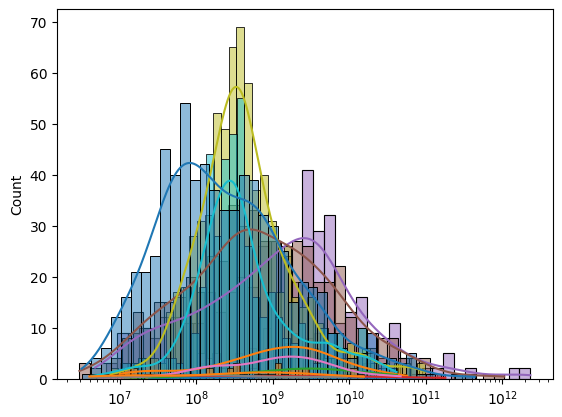

In [13]:
# @title распределение количества компаний
cnt=0
for i in Set_Sector__:
  sns.histplot(arr_sector_MC[cnt], bins=40, kde=True ,log_scale=True, legend= True)
  cnt+=1

In [14]:
# @titleсписок секторов
ListSector=[]
for i in Set_Sector__:
  ListSector.append(i)
print(ListSector)

['Basic Materials', 'Real Estate', 'Utilities', 'Telecommunications', 'Technology', 'Consumer Discretionary', 'Energy', 'Miscellaneous', 'Finance', 'Industrials', 'Health Care', 'Consumer Staples']


== ==================================================== == ==========================================

# Задача 5 V
Провести анализ курса акций компании за все время с момента выхода на рынок.

== ==================================================== == ==========================================

In [15]:
!pip install yfinance

In [16]:
# @title Выбрали компанию
import yfinance as yf
import pandas_datareader as web
print(df2.loc[df2['Symbol'] == 'RIO'])
print('==============================================')
df_RIO=yf.download(tickers = 'RIO', period='25y',interval='1d', group_by='column')


       NN Symbol                        Name  Last Sale  Net Change  % Change  \
642  6451    RIO  Rio Tinto Plc Common Stock  69.709999       -1.98    -2.762   

       Market Cap    Country  IPO Year   Volume           Sector  \
642  112965055139  Australia      2002  2270083  Basic Materials   

         Industry    Z  
642  Metal Mining  RIO  
[*********************100%%**********************]  1 of 1 completed


DatetimeIndex(['1998-10-28', '1998-10-29', '1998-10-30', '1998-11-02',
               '1998-11-03', '1998-11-04', '1998-11-05', '1998-11-06',
               '1998-11-09', '1998-11-10',
               ...
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-23', '2023-10-24', '2023-10-25',
               '2023-10-26', '2023-10-27'],
              dtype='datetime64[ns]', name='Date', length=6291, freq=None)
6291
1998
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2021-01-04  78.980003  79.349998  77.389999  77.389999  58.455593  2593800
2021-01-05  77.809998  79.529999  77.419998  79.260002  59.868080  2265400
2021-01-06  82.269997  83.500000  81.800003  82.800003  62.541969  2771800
2021-01-07  84.930000  86.169998  84.430000  85.980003  64.943962  2888300
2021-01-08  85.500000  86.900002  84.949997  86.690002  65.480247  2835900


<ipython-input-17-5cb6023db090>:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(df_RIO['2021'])


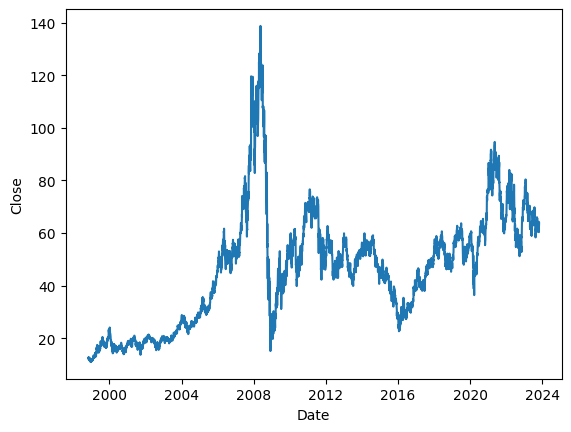

In [17]:
# @title Смотрим график стоимости акции RIO
#df_RIO.info()
#print(df_RIO['Close'])
print(df_RIO.index)
print(len(df_RIO.index))
#print(df_RIO['2018-12'])
print(df_RIO.index[2].year)
print(df_RIO['2021'])
#print(len(df_RIO['2021'].index))
#print(df_RIO.index[2].day)
#print(df_RIO.index[2].hour)
#print(df_RIO.index[2].minute)
sns.lineplot(x='Date', y='Close', data=df_RIO)
plt.show()

С даты выхода н биржу до 2008 года акции стабильно росли. После Великого кризиса 2008 года восстановление до уровня 60-80. далее 10-12 лет акции стоили дешевле 60. В 2014-15 годах для компании были не самые простые времена. Рост с 2016 по 2021 до 90. Далее по сегодняшний день цены то растут то падают. Текущие цены могут как пробить уровень поддержки по линии минимумов 1016-2020-2022 и ещё снизиться.
***Стоимость акций в течении следующих 10 лет могут вырасти. ***

== ==================================================== == ==========================================

# Задача 6  V
Рассчитать индекс индустрии за последние 20 лет (можно меньше) на основе 10 крупнейших компаний. Сравнить динамику индекса и курса акций выбранной компании.

== ==================================================== == ==========================================

In [39]:
# @title Определяем список компаний для формирования индекса, загружаем данные
Choice_ind='Business Services'
df5=df2.loc[df2['Industry']==Choice_ind]
df6=df5.sort_values(by='Market Cap',ascending=False).head(10)
cmps=df6['Symbol'].values.tolist()
print(cmps)
ipos=2003
for i in cmps:
  iposi=int(df2['IPO Year'].loc[df2['Symbol']==i].values)
  print(iposi , i)
  if iposi>ipos:
    ipos=iposi
startT=str(2023-ipos-1)+'y'
print(startT)

tk_0 = yf.Ticker('MA')
tk_1 = yf.Ticker('WNS')
tk_2 = yf.Ticker('PAYX')
tk_3 = yf.Ticker('VRSK')
tk_4 = yf.Ticker('AKAM')
tk_5 = yf.Ticker('ZG')
tk_6 = yf.Ticker('MMS')

print(tk_0.options)
#tk_0.get('marketCap')


df_DL0=yf.download(tickers = 'MA', period=startT, interval='1d', group_by='column')
df_DL1=yf.download(tickers = 'WNS', period=startT, interval='1d', group_by='column')
df_DL2=yf.download(tickers = 'PAYX', period=startT, interval='1d', group_by='column')
df_DL3=yf.download(tickers = 'VRSK', period=startT, interval='1d', group_by='column')
df_DL4=yf.download(tickers = 'AKAM', period=startT, interval='1d', group_by='column')
df_DL5=yf.download(tickers = 'ZG', period=startT, interval='1d', group_by='column')
df_DL6=yf.download(tickers = 'MMS', period=startT, interval='1d', group_by='column')
print('Требованиям удовлетворяют только 7 компаний - данные доступны для загрузки с "yf" и за продолжительный период : MA  WNS  PAYX  VRSK  AKAM   ZG  MMS  ')

['MA', 'FISV', 'PAYX', 'CTAS', 'VRSK', 'AKAM', 'NLSN', 'ZG', 'MMS', 'WNS']
2006 MA
1986 FISV
1983 PAYX
1983 CTAS
2009 VRSK
1999 AKAM
2011 NLSN
2011 ZG
1997 MMS
2006 WNS
11y
('2023-11-03', '2023-11-10', '2023-11-17', '2023-11-24', '2023-12-01', '2023-12-15', '2024-01-19', '2024-04-19', '2024-06-21', '2025-01-17', '2026-01-16')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Требованиям удовлетворяют только 7 компаний - данные доступны для загрузки с "yf" и за продолжительный период 


In [45]:
# @title считаем индекс
dfsum= df_DL0+df_DL1+df_DL2+df_DL3+df_DL4+df_DL5+df_DL6
Index_Industry_7comp=dfsum / 7
#print(Index_Industry_7comp)
#Index_Industry_7comp.info()
df_DL0['Close']

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-10-31   30.653050   31.538132   30.277534   31.051788   28.725900   
2012-11-01   31.106579   31.710632   30.933098   31.435425   29.062776   
2012-11-02   31.461309   31.773097   30.861006   30.986107   28.641665   
2012-11-05   30.946965   31.252002   30.664089   30.980311   28.642268   
2012-11-06   30.805908   31.210852   30.649856   31.011525   28.645096   
...                ...         ...         ...         ...         ...   
2023-10-23  144.198571  145.918568  142.954286  143.897144  143.897144   
2023-10-24  144.511428  145.875714  142.560000  143.897143  143.897143   
2023-10-25  142.987144  144.320000  141.187140  142.220001  142.220001   
2023-10-26  140.138569  142.075711  138.125715  138.882856  138.882856   
2023-10-27  139.017141  139.584286  136.457141  137.659999  137.659999   

                  Volume  
Date      

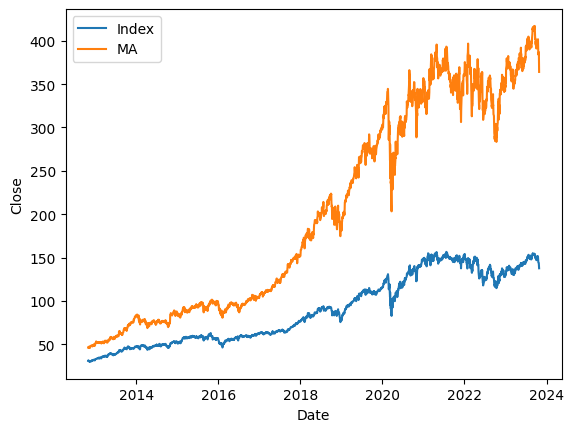

In [61]:
# @title выбираем компнию внутрииндекса МА и выводим графики
sns.lineplot(x='Date', y='Close', data=Index_Industry_7comp, legend='brief', label='Index')
sns.lineplot(x='Date', y='Close', data=df_DL0, legend='brief', label='MA')
plt.show()

In [62]:
# @title определяем регрессию, насколько зависимости близки
import statsmodels.api as sm
model = sm.OLS(Index_Industry_7comp['Close'], df_DL0['Close'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.622e+05
Date:                Sun, 29 Oct 2023   Prob (F-statistic):                        0.00
Time:                        09:58:29   Log-Likelihood:                         -10963.
No. Observations:                2767   AIC:                                  2.193e+04
Df Residuals:                    2766   BIC:                                  2.193e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R2 = 0.983 в целом индекс и курс акции МА коррелируется

== ==================================================== == ==========================================

# Задача 7
Сравнить динамику показателей мировой экономики (ВВП, население, инфляция и т.д., не менее пяти) и динамику индекса. Использовать данные: https://datahub.io/collections/economic-data#other-economic-data-and-indicators

== ==================================================== == ==========================================

In [ ]:
df_t7_1_oil=pd.read_csv('t7_1_brent-day_csv.csv')
df_t7_1_oil.info()
df_t7_1_oil.describe()

In [ ]:
df_t7_2_gas=pd.read_csv('t7_2_nat gas daily_csv.csv')
df_t7_2_gas.info()
df_t7_2_gas.describe()

In [ ]:
df_t7_3_ppl=pd.read_csv('t7_3_population_csv.csv')
df_t7_3_ppl.info()
df_t7_3_ppl.describe()

In [ ]:
df_t7_4_gld=pd.read_csv('t7_4_gold monthly_csv.csv')
df_t7_4_gld.info()
df_t7_4_gld.describe()

In [ ]:
df_t7_5_gdp=pd.read_csv('t7_5_gdp_csv.csv')
df_t7_5_gdp.info()
df_t7_5_gdp.describe()
print(df_t7_5_gdp.loc[df_t7_5_gdp['Year'] == 2016])

Загрузили данные, теперь работаем с ними

In [230]:
# @title определили по годам показатели средние
T7_dates=[2012, 2013, 2014, 2015, 2016]
T7_index=[]  #  Index_Industry_7comp
T7_gas=[]  #  df_t7_2_gas
T7_oil=[]  #  df_t7_1_oil
T7_gold=[] #  df_t7_4_gld
T7_gdp=[]  #  df_t7_5_gdp
T7_ppl=[]  #  df_t7_3_ppl
T7_labels=['T7_index', 'T7_gas', 'T7_oil', 'T7_gold', 'T7_gdp', 'T7_ppl']
for i in T7_dates:
  T7_index.append(Index_Industry_7comp[str(i)].mean().Close)

  dftemp=df_t7_5_gdp.loc[df_t7_5_gdp['Country Name'] == 'United States']
  T7_gdp.append(dftemp['Value'].loc[dftemp['Year']== i].values[0])

  t1=str(i)+'-01-01'
  t2=str(i)+'-12-31'
  #print(t1, t2)
  dftemp=df_t7_2_gas[(df_t7_2_gas['Date'] >= t1) & (df_t7_2_gas['Date'] <= t2)]
  T7_gas.append(dftemp['Price'].mean())

  dftemp=df_t7_1_oil[(df_t7_1_oil['Date'] >= t1) & (df_t7_1_oil['Date'] <= t2)]
  T7_oil.append(dftemp['Brent Spot Price'].mean())

  tm1=str(i)
  tm2=str(i+1)
  dftemp=df_t7_4_gld[(df_t7_4_gld['Date'] > tm1) & (df_t7_4_gld['Date'] < tm2)]
  T7_gold.append(dftemp['Price'].mean())

  dftemp=df_t7_3_ppl.loc[df_t7_3_ppl['Country Name'] == 'United States' ]
  dftemp2=dftemp.loc[dftemp['Year']==i].Value.values
  T7_ppl.append(dftemp2[0])

print('T7_index :', T7_index)
print('T7_gdp   :', T7_gdp)
print('T7_gas   :', T7_gas)
print('T7_oil   :', T7_oil)
print('T7_gold  :', T7_gold)
print('T7_ppl   :', T7_ppl)

T7_index : [31.074344356043806, 40.26161311651303, 48.47238177128661, 57.41698539716587, 57.02185371619503]
T7_gdp   : [16155255000000.0, 16691517000000.0, 17393103000000.0, 18120714000000.0, 18624475000000.0]
T7_gas   : [2.7544841269841274, 3.731269841269841, 4.372698412698413, 2.623984375, 2.515977011494253]
T7_oil   : [111.5706827309237, 108.555, 98.9696062992126, 52.31654901960784, 31.021153846153844]
T7_gold  : [1668.4970833333334, 1410.8001666666667, 1266.3356666666666, 1160.5910000000001, 1248.1618333333333]
T7_ppl   : [313830990, 315993715, 318301008, 320635163, 322941311]


<ipython-input-230-169f0e04c845>:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  T7_index.append(Index_Industry_7comp[str(i)].mean().Close)
<ipython-input-230-169f0e04c845>:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  T7_index.append(Index_Industry_7comp[str(i)].mean().Close)
<ipython-input-230-169f0e04c845>:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  T7_index.append(Index_Industry_7comp[str(i)].mean().Close)
<ipython-input-230-169f0e04c845>:10: FutureWarning: Indexing a Data

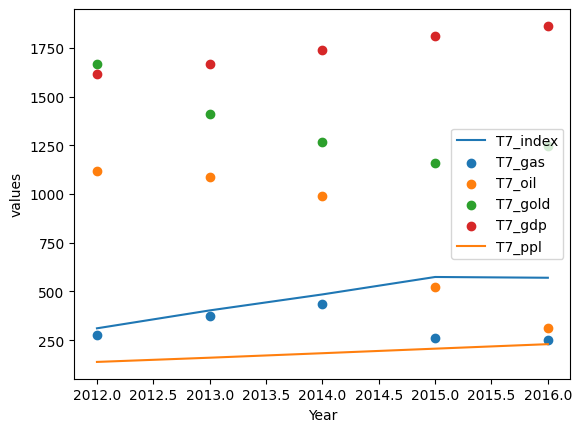

In [248]:
# @title Выводим графики для анализа
arrT7_dates=np.array(T7_dates)
arrT7_index=np.array(T7_index)*10  #  Index_Industry_7comp
arrT7_gas=np.array(T7_gas)*100  #  df_t7_2_gas
arrT7_oil=np.array(T7_oil)*10  #  df_t7_1_oil
arrT7_gold=np.array(T7_gold) #  df_t7_4_gld
arrT7_gdp=np.array(T7_gdp)/10000000000  #  df_t7_5_gdp
arrT7_ppl=np.array(T7_ppl)/100000-3000  #  df_t7_3_ppl


plt.clf()
plt.plot(arrT7_dates, arrT7_index,  label= T7_labels[0])
plt.scatter(arrT7_dates, arrT7_gas,  label= T7_labels[1])
plt.scatter(arrT7_dates, arrT7_oil,  label= T7_labels[2])
plt.scatter(arrT7_dates, arrT7_gold,  label= T7_labels[3])
plt.scatter(arrT7_dates, arrT7_gdp,  label= T7_labels[4])
plt.plot(arrT7_dates, arrT7_ppl,  label= T7_labels[5])



plt.legend()
plt.xlabel('Year')
plt.ylabel('values')
# T7_labels=['T7_index', 'T7_gas', 'T7_oil', 'T7_gold', 'T7_gdp', 'T7_ppl']

plt.show()

Данные есть только за период 2012-2016 . Увеличение индекса индустрии 'Business Services' с 2012 по 2016 сопровождалось увеличением населения USA и ВВП, снижением цен на нефть и золота.

In [ ]:
# @title Trash

i=2013
print('ww')
#Index_Industry_7comp[str(i)].mean().Close
#df_t7_5_gdp.loc[df_t7_5_gdp['Country Name'] == 'United States']
#dftemp=df_t7_5_gdp.loc[df_t7_5_gdp['Country Name'] == 'United States']
#dftemp2=dftemp['Value'].loc[dftemp['Year']== i].values
#print(df_t7_2_gas)
df_t7_2_gas['Date'] = pd.to_datetime(df_t7_2_gas['Date'])

#print(t1, t2)

df_t7_2_gas2=df_t7_2_gas[(df_t7_2_gas['Date'] > t1) & (df_t7_2_gas['Date'] < t2)]
dedf=df_t7_2_gas2['Price'].mean()

df_t7_3_ppl2=df_t7_3_ppl.loc[df_t7_3_ppl['Country Name'] == 'United States' ]
df_t7_3_ppl3=df_t7_3_ppl2.loc[df_t7_3_ppl2['Year']==i].Value.values
print(df_t7_3_ppl3)

#Countries_list=set(df_t7_5_gdp['Country Name'].unique())
#df_t7_2_gas2=df_t7_2_gas.loc[df_t7_2_gas['Date']]

== ==================================================== == ==========================================

# Задача 8
Сравнить курс акций компании и динамику показателей национальной экономики (не менее пяти). Использовать данные: https://microdata.worldbank.org/index.php/catalog/history/

== ==================================================== == ==========================================

== ==================================================== == ==========================================

# Задача 9
Сделать предсказание курса акций с помощью модели ARIMA, на следующие две недели. Подобрать наилучшие параметры модели.

== ==================================================== == ==========================================

== ==================================================== == ==========================================

# Задача 10  V
Загрузить в блокнот изображение логотипа компании. Выполнить с изображением 3-4 операции, используя любые функции из библиотеки OpenCV (кроме изменения контраста и яркости).https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html

== ==================================================== == ==========================================

In [249]:
#import cv2
#from urllib.request import urlopen
#import numpy as np
#from google.colab.patches import cv2_imshow

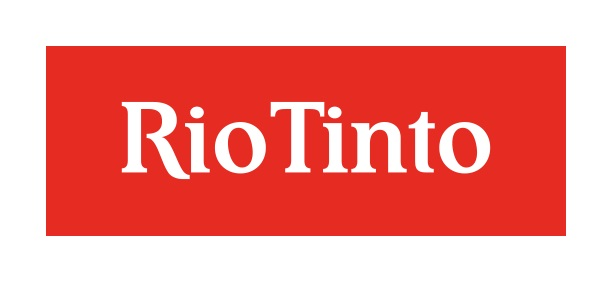

In [269]:
# @title Загрузка исходной картинки
#resp=urlopen("https://upload.wikimedia.org/wikipedia/commons/7/73/Rio-Tinto-logo.png")
#image_array=np.asarray(bytearray(resp.read()),dtype=np.uint8)
#image=cv2.imdecode(image_array,cv2.IMREAD_COLOR)
#cv2_imshow(image)
import numpy as np
import cv2 as cv
img = cv.imread('Rio-Tinto-logo.jpg')
cv2_imshow(img)

In [286]:
# @title изменение 1 - сжатие по вертикали
import cv2

src = cv2.imread('Rio-Tinto-logo.jpg', cv2.IMREAD_UNCHANGED)

# Set a new height in pixels
new_height = 200

# Dsize
dsize = (src.shape[1], new_height)

# Resize image
output = cv2.resize(src, dsize, interpolation = cv2.INTER_AREA)

cv2.imwrite('Rio-Tinto-logo2.jpg',output)


True

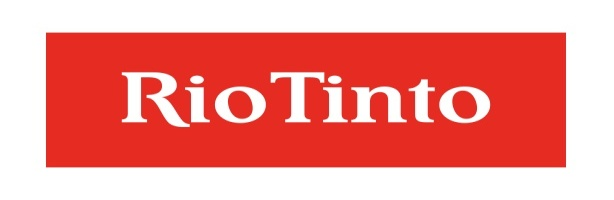

In [287]:
img = cv.imread('Rio-Tinto-logo2.jpg')
cv2_imshow(img)

In [289]:
# @title Изменение 2 - изменение размера
import cv2

src = cv2.imread('Rio-Tinto-logo.jpg', cv2.IMREAD_UNCHANGED)

# Percent by which the image is resized
scale_percent = 50

# Calculate the 50 percent of original dimensions
width = int(src.shape[1] * scale_percent / 100)
height = int(src.shape[0] * scale_percent / 100)

# Dsize
dsize = (width, height)

# Resize image
output = cv2.resize(src, dsize)

cv2.imwrite('Rio-Tinto-logo3.jpg',output)

True

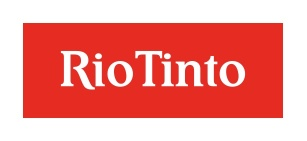

In [290]:
img = cv.imread('Rio-Tinto-logo3.jpg')
cv2_imshow(img)

In [291]:
# @title Изменение 4 добавтление текста
import numpy as np
import cv2

image = cv2.imread('Rio-Tinto-logo.jpg',cv2.IMREAD_UNCHANGED)

position = (10,50)
cv2.putText(
     image, #numpy array on which text is written
     "Python Examples", #text
     position, #position at which writing has to start
     cv2.FONT_HERSHEY_SIMPLEX, #font family
     1, #font size
     (209, 80, 0, 255), #font color
     3) #font stroke
cv2.imwrite('Rio-Tinto-logo4.jpg', image)

True

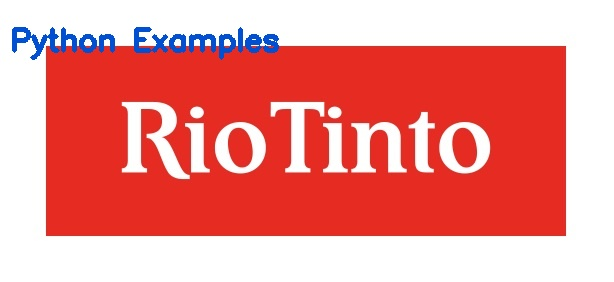

In [292]:
img = cv.imread('Rio-Tinto-logo4.jpg')
cv2_imshow(img)